## Step 1 — Import Packages and Load Data

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [27]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [9]:
df = pd.read_csv("BAB265-XLS-ENG.csv")

In [10]:
# create new column, Date that includes Year, Month and Day
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))

## Step 2 — Data Visualization

In [11]:
df_Date = df.groupby('Date')['Answered', 'Unanswered'].sum().reset_index()

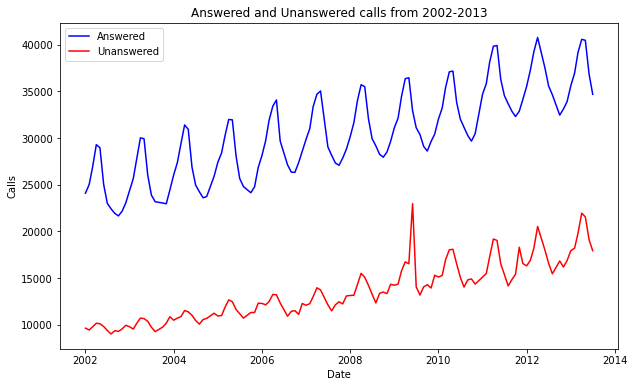

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(df_Date['Date'], df_Date['Answered'], 'b-', label = 'Answered')
plt.plot(df_Date['Date'], df_Date['Unanswered'], 'r-', label = 'Unanswered')
plt.xlabel('Date')
plt.ylabel('Calls')
plt.title('Answered and Unanswered calls from 2002-2013')
plt.legend()

In [13]:
df_Month = df.groupby('Month')['Answered', 'Unanswered'].sum().reset_index()

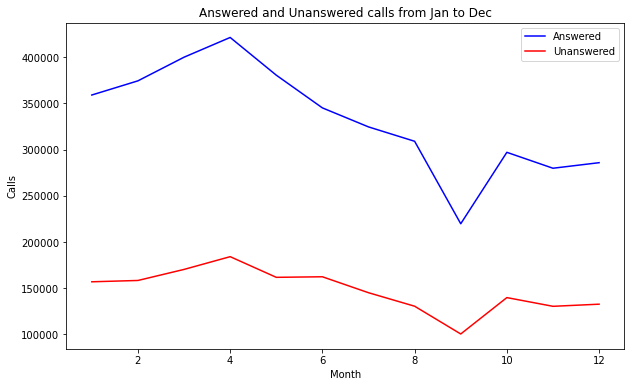

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(df_Month['Month'], df_Month['Answered'], 'b-', label = 'Answered')
plt.plot(df_Month['Month'], df_Month['Unanswered'], 'r-', label = 'Unanswered')
plt.xlabel('Month')
plt.ylabel('Calls')
plt.title('Answered and Unanswered calls from Jan to Dec')
plt.legend()

comments: From about visulazations, 
    
1. we can see clearly that, the amount of calls Jennie Maze Limited Enhancing Call Center received was increasing from year 2002 to 2013.

2. The peak of incoming calls in the month of April and May.

## Step 3 — Time Series Forecasting with Prophet

In [53]:
df_Date["All_calls"] = df_Date['Answered'] + df_Date['Unanswered']

In [70]:
Sub_df_Date = df_Date[['Date', 'All_calls']]
Sub_df_Date.head()

,Date,All_calls
0,2002-01-01,33715
1,2002-02-01,34445
2,2002-03-01,36655
3,2002-04-01,39440
4,2002-05-01,39060


In [56]:
# rename columns
# we must provide Prophet with a new DataFrame containing a ds column 
# that holds the dates for which we want predictions
Sub_df_Date.columns = ['ds', 'y'] 

In [65]:
# specify the desired range of our uncertainty interval 
# by setting the interval_width parameter
my_model = Prophet(interval_width = 0.80)

In [66]:
my_model.fit(Sub_df_Date)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [67]:
# we are looking to predict future values of our time series 
# 3 years into the future.
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')

In [78]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
137,2014-02-01,57599.353528,56516.658785,58801.520192
138,2014-03-01,60702.841795,59543.331819,61912.014687
139,2014-04-01,63625.950998,62463.476823,64787.483951
140,2014-05-01,63505.487367,62348.358079,64618.639406
141,2014-06-01,59181.625678,57982.550862,60354.898622
142,2014-07-01,55722.675766,54601.187067,56833.165380
143,2014-08-01,54256.925883,52987.205406,55414.899436
144,2014-09-01,54036.360978,52868.924223,55239.215424
145,2014-10-01,53993.800566,52749.347807,55061.962962
146,2014-11-01,54852.695348,53703.488764,56034.346148


ds: the datestamp of the forecasted value
    
yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)

yhat_lower: the lower bound of our forecasts

yhat_upper: the upper bound of our forecasts

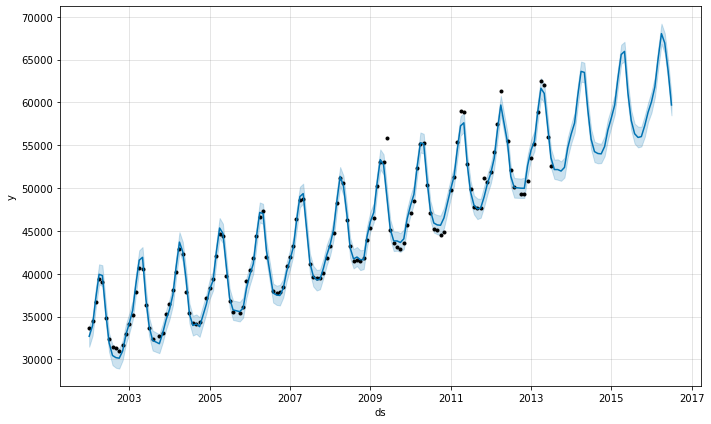

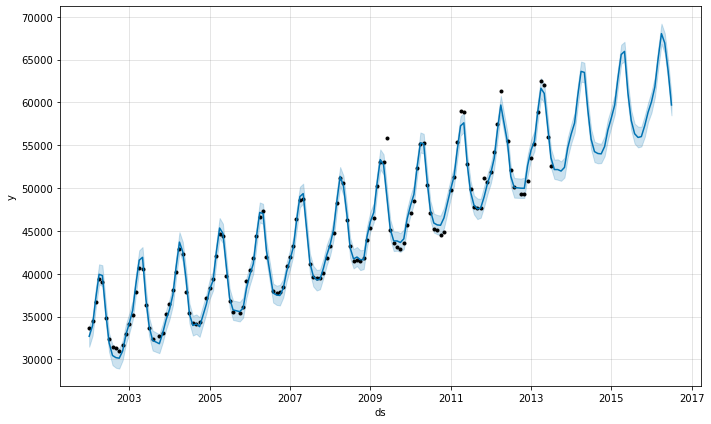

In [69]:
my_model.plot(forecast, uncertainty=True)

Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).

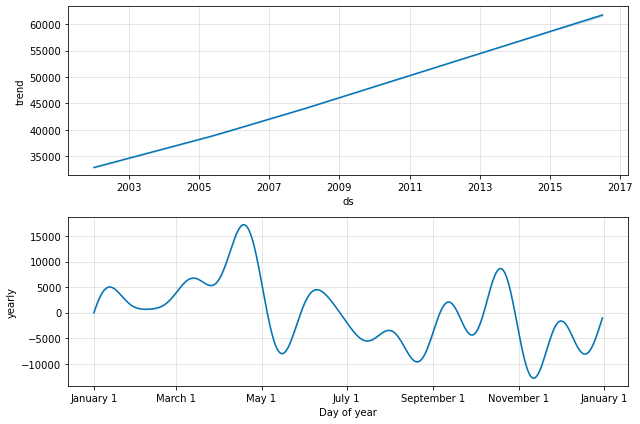

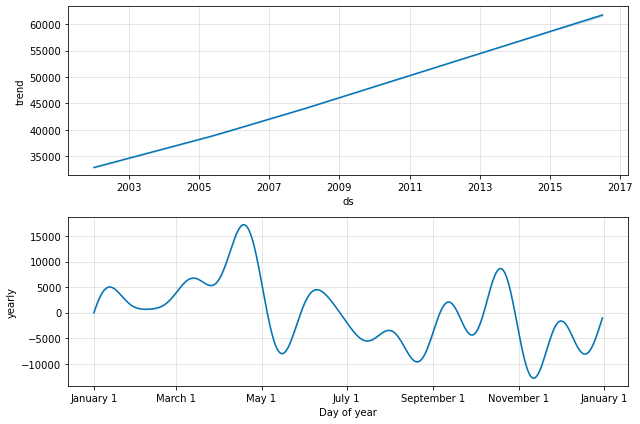

In [62]:
my_model.plot_components(forecast)

Conclusion:

The first plot shows the incoming volume of calls has been linearly increasing over time. 

The second plot shows that the most traffic occurs during the months of April and May.

## References:
1. Forecasting at scale https://facebook.github.io/prophet/
2. An End-to-End Project on Time Series Analysis and Forecasting with Python https://towardsdatascience.com/an-end-toend-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
3. A Guide to Time Series Forecasting with Prophet in Python 3 https://www.digitalocean.com/community/tutorials/a-guide-totime-series-forecasting-with-prophet-in-python-3